In [1]:
import pandas as pd
breast = pd.read_csv('breast-cancer.csv')
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

breast['diagnosis'] = np.where(breast['diagnosis'] == 'M', 1,0)
features = ['area_mean','texture_mean']

x = breast[features]
y = breast['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=y, random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
pred = clf.fit(x_train,y_train).predict(x_test)

print('정확도 : ',clf.score(x_test,y_test))

정확도 :  0.9064327485380117


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(x_test)
test_cm = confusion_matrix(y_test,pred)
test_acc = accuracy_score(y_test,pred)
test_prc = precision_score(y_test,pred)
test_rc = recall_score(y_test,pred)
test_f1 = f1_score(y_test,pred)

print(test_cm,'\n')
print('정확도\t{}'.format(round(test_acc*100,2)))
print('정밀도\t{}'.format(round(test_prc*100,2)))
print('재현율\t{}'.format(round(test_rc*100,2)))

[[104   3]
 [ 13  51]] 

정확도	90.64
정밀도	94.44
재현율	79.69


C:\Users\suhye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


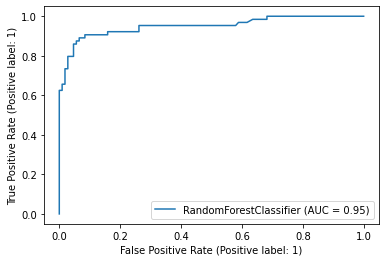

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(clf,x_test,y_test)
plt.show()

In [8]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean','texture_mean'])
feature_importances = pd.concat([column_nm,pd.DataFrame(importances)],
                                axis=1)

feature_importances.columns = ['feature_nm','importances']
print(feature_importances)

     feature_nm  importances
0     area_mean     0.691765
1  texture_mean     0.308235


<BarContainer object of 2 artists>

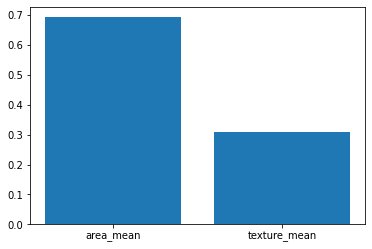

In [10]:
f = features 
xtick_label_poistion = list(range(len(f)))
plt.xticks(xtick_label_poistion, f)
plt.bar([x for x in range(len(importances))], importances)